## CLASIFICADOR KNN ( K-nearest neighbours ) 

### Julian Ferres - Nro.Padrón 101483

## Enunciado

Se tienen $n$ puntos, de los cuales la mitad son de $clase$ $0$ y la restante mitad de $clase$ $1$

Utilizando la regla de los *k primeros vecinos* $(KNN)$

Clasificar algunos puntos ( generados con probabilidad uniforme ) de la región cuadrada $\left[-4;4\right] \times \left[-4;4\right]$ 

## Solución

In [356]:
#Import libraries
import numpy as np
from scipy.spatial import ConvexHull
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
#Plots
import matplotlib.pyplot as plt
%matplotlib inline

In [357]:
n = 1000 #Tamaño de muestra

In [358]:
train = np.zeros((n,3))

#### Toma de muestra (train)

In [359]:
mean0 = [-1, 0]
mean1 = [1, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x1, y1 = np.random.multivariate_normal(mean0, cov, int(n/2)).T
x2, y2 = np.random.multivariate_normal(mean1, cov, int(n/2)).T
clase = np.concatenate( (np.zeros(int(n/2)), np.ones(int(n/2))) )

In [360]:
normal_0 = np.column_stack((x1, y1))
normal_1 = np.column_stack((x2, y2))

### Puntos a clasificar

In [361]:
#Cantidad de puntos a clasificar
m= int(0.2 * n)

In [362]:
x , y = np.random.uniform(-4,4,m) , np.random.uniform(-4,4,m)
u_test_points = np.column_stack(( x, y )) #Uniform test points

In [363]:
u_test_points.shape

(200, 2)

### Muestro los puntos con su envolvente convexa

In [364]:
hull = ConvexHull(u_test_points)
hull0 = ConvexHull(normal_0[:,:2])
hull1 = ConvexHull(normal_1[:,:2])

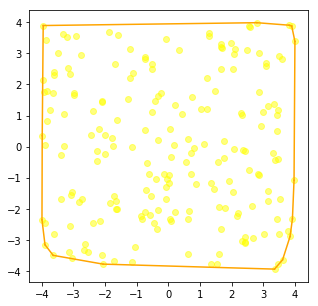

In [365]:
plt.figure(figsize = (5,5))
plt.scatter(u_test_points[:,0], u_test_points[:,1], color='yellow' , alpha = 0.5)
for simplex in hull.simplices:
    plt.plot(u_test_points[simplex, 0], u_test_points[simplex, 1], 'k-' , color = 'orange')

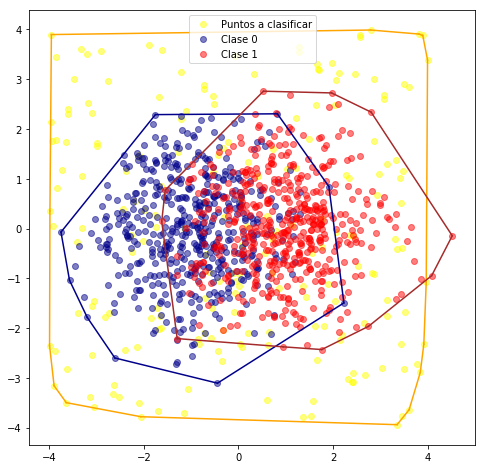

In [366]:
plt.figure(figsize=(8, 8))
plt.scatter( x, y, alpha = 0.5 , color='yellow' ,  label = 'Puntos a clasificar');
for simplex in hull.simplices:
    plt.plot(u_test_points[simplex, 0], u_test_points[simplex, 1], 'k-' , color = 'orange');
    
plt.scatter( x1, y1, alpha='0.5', color='darkblue' ,  label = 'Clase 0');
for simplex in hull0.simplices:
    plt.plot(normal_0[simplex, 0], normal_0[simplex, 1], 'k-' , color = 'darkblue');
    
plt.scatter( x2, y2, alpha='0.5', color='red' , label = 'Clase 1');
for simplex in hull1.simplices:
    plt.plot(normal_1[simplex, 0], normal_1[simplex, 1], 'k-' , color = 'brown')

plt.legend()
plt.show()

## Clasificador KNN

In [367]:
train = np.concatenate((normal_0 , normal_1))

In [368]:
neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(train, clase) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [369]:
output = np.zeros(m)
idx = 0
for i in u_test_points:
    output[idx] = (neigh.predict([i]))
    idx+=1

In [370]:
salida = pd.DataFrame({'xpoints' : u_test_points[:,0], 'ypoints' : u_test_points[:,1] , 'clase' : output})

In [371]:
idx0 = (salida['clase'] == 0 )
idx1 = (salida['clase'] == 1 )

clase_0 = salida.loc[idx0]
clase_1 = salida.loc[idx1]

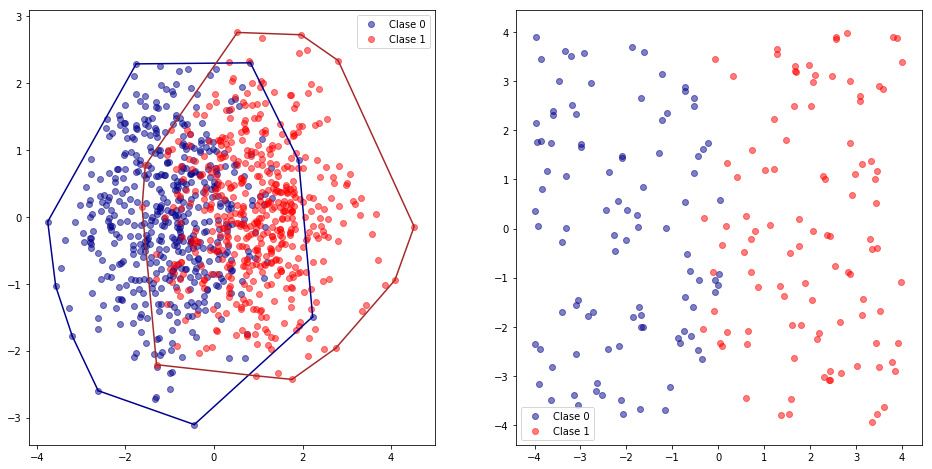

In [372]:
fig , ax = plt.subplots(ncols = 2 , figsize = (16,8))
ax[0].scatter( x1, y1, alpha='0.5', color='darkblue' ,  label = 'Clase 0');
for simplex in hull0.simplices:
    ax[0].plot(normal_0[simplex, 0], normal_0[simplex, 1], 'k-' , color = 'darkblue');
    
ax[0].scatter( x2, y2, alpha='0.5', color='red' , label = 'Clase 1');
for simplex in hull1.simplices:
    ax[0].plot(normal_1[simplex, 0], normal_1[simplex, 1], 'k-' , color = 'brown');
ax[0].legend()

ax[1].scatter( clase_0.xpoints , clase_0.ypoints , alpha='0.5', color='darkblue' ,  label = 'Clase 0');
ax[1].scatter( clase_1.xpoints , clase_1.ypoints , alpha='0.5', color='red' ,  label = 'Clase 1');
ax[1].legend()
plt.show()

## Bonus: Test con puntos identicamente distribuidos a los de train

### Puntos a clasificar

In [373]:
#Cantidad de puntos a clasificar
m1=1000

#### Puntos test, tanto de clase 0 como de clase 1

In [374]:
t_x1, t_y1 = np.random.multivariate_normal(mean0, cov, m1).T
t_x2, t_y2 = np.random.multivariate_normal(mean1, cov, m1).T

In [375]:
n0_test = np.column_stack((t_x1, t_y1))
n1_test = np.column_stack((t_x2, t_y2))

#### Se toma como estimador de la función perdida del clasificador $\Phi$ a:

$$ \widehat{L}_n (\Phi)= \frac{1}{n} \sum_{i=1}^{n-test} 1\{ \Phi(X_i) \neq Y_i \}$$

Con $X_i$ el vector aleatorio de features, con $Y_i$ su label correspondiente.

In [380]:
prediction_n0 = np.zeros(m1)
idx = 0
for i in n0_test:
    prediction_n0[idx] = (neigh.predict([i]))
    idx+=1
    
error_n0 = prediction_n0.mean()

In [381]:
error_n0

0.167

In [382]:
prediction_n1 = np.zeros(m1)
idx = 0
for i in n1_test:
    prediction_n1[idx] = (neigh.predict([i]))
    idx+=1
    
error_n1 = 1 - prediction_n1.mean()

In [384]:
error_n1

0.16100000000000003

Link al Repo de GitHub: https://github.com/julianferres/Aprendizaje-Estadistico.git